# 中值滤波

In [1]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import median_filter

In [2]:
def make_guassian_window(n, sigma=1):
    """
    使用高斯分布的权重创建一个n*n的方形窗口
    """
    nn = int((n-1)/2)
    a = np.asarray([[x**2 + y**2 for x in range(-nn,nn+1)] for y in range(-nn,nn+1)])
    # np.asarray可以将输入转化为np.array, 这里输入为一个列表推导式
    return np.exp(-a/(2*sigma**2))

In [3]:
def median_filter_all_colours(im_small, window_size):
    """
    对图像所有通道运用中值滤波
    """
    ims = []
    for d in range(3):
        im_conv_d = median_filter(im_small[:,:,d], size=(window_size,window_size))
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    
    return im_conv

In [4]:
src = imgio.imread('../datas/f3.jpg')
dst = median_filter_all_colours(src,11)

Text(0.5,1,'Median Filter')

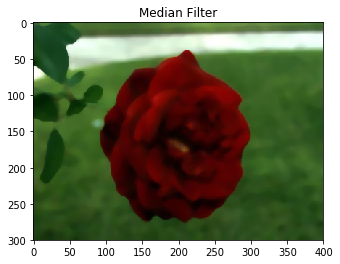

In [6]:
plt.imshow(dst)
plt.title('Median Filter')